Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
#statistical test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\loan-train.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data contains:-
        *Loan_ID:-Individual id for all customers which are unique
        *Gender:-clasifing whether he person is ale or female
        *Married:-Classifing whether the person is married or unmarried
        *Dependents:-is the person dependent
        *Education:-graduated or not
        *Self_Employed:-wmployed or unemployed
        *ApplicantIncome:-income of the person
        *CoapplicantIncome:-income of the co-applicant
        *LoanAmount:-amount requested for loan
        *Loan_Amount_Term:-loan terms
        *Credit_History:-whether the credit history is good or bad
        *Property_Area:-at which place there property is present 
        *Loan_Status:-approved or not

In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

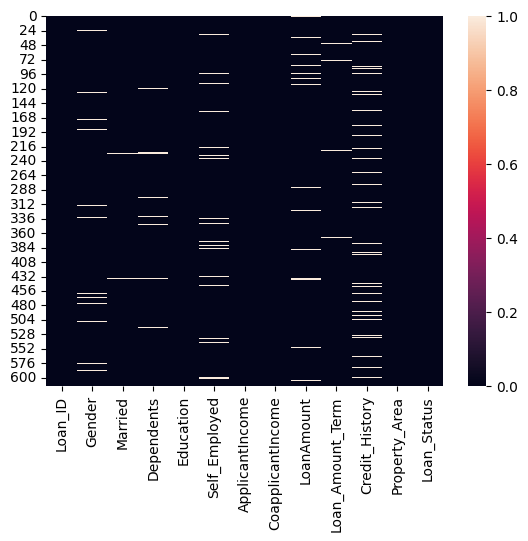

In [7]:
sns.heatmap(data.isnull())

Exploratory Data Analysis

In [8]:
data[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [12]:
data.Loan_Status.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [13]:
data.Loan_Status.replace({"Y":1,"N":0},inplace=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

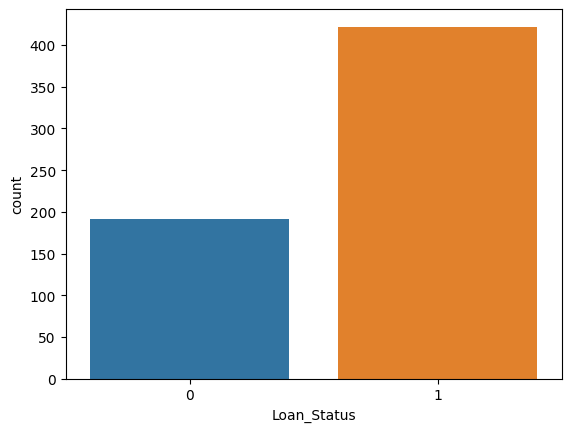

In [14]:
sns.countplot(x="Loan_Status",data=data)

Gender

In [15]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
def cat(cat_feature):
    print("Data Type\n",data[cat_feature].dtype)
    print("Unique Datas\n",data[cat_feature].unique())
    print("Describing the data\n",data[cat_feature].describe())
    print("Count of each unique datas\n",data[cat_feature].value_counts())

    sns.countplot(x=cat_feature,data=data)
    plt.show()
    sns.countplot(x=cat_feature,hue="Loan_Status",data=data)
    plt.show()

In [17]:
def num(num_features):
    print("Data Type\n",data[num_features].dtype)
    print("Describing the data\n",data[num_features].describe())

    data.groupby("Loan_Status")[num_features].mean().plot(kind="bar")
    plt.show()
    sns.violinplot(x="Loan_Status",y=num_features,data=data)
    plt.show()
    sns.boxplot(x=num_features,data=data)
    plt.show()

In [18]:
data["Gender"].fillna(value="Not Mentioned",inplace=True)

Data Type
 object
Unique Datas
 ['Male' 'Female' 'Not Mentioned']
Describing the data
 count      614
unique       3
top       Male
freq       489
Name: Gender, dtype: object
Count of each unique datas
 Male             489
Female           112
Not Mentioned     13
Name: Gender, dtype: int64


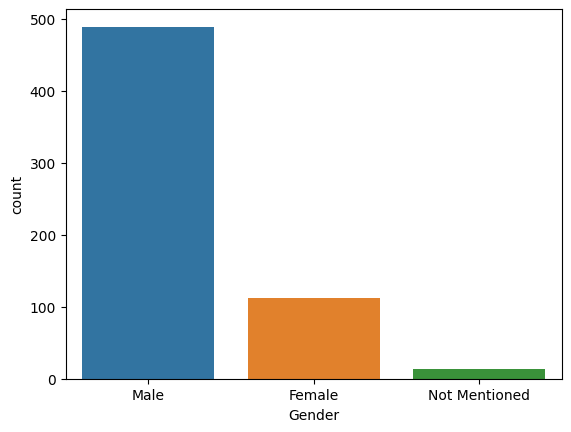

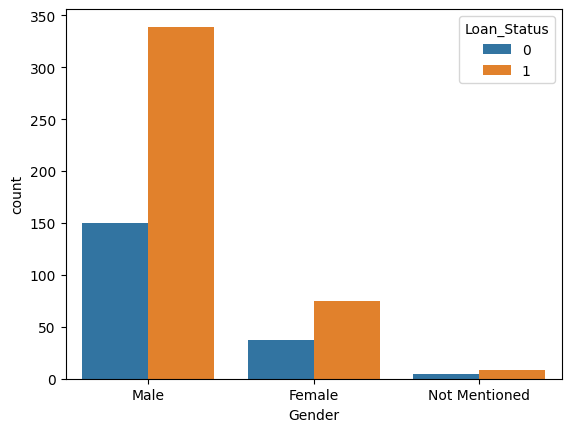

In [19]:
cat("Gender")

In [20]:
label_encoder=LabelEncoder()

In [21]:
data["Gender"]=label_encoder.fit_transform(data["Gender"]).astype("int64")

In [22]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
data.Married.fillna(value="Not_mentioned",inplace=True)

Data Type
 object
Unique Datas
 ['No' 'Yes' 'Not_mentioned']
Describing the data
 count     614
unique      3
top       Yes
freq      398
Name: Married, dtype: object
Count of each unique datas
 Yes              398
No               213
Not_mentioned      3
Name: Married, dtype: int64


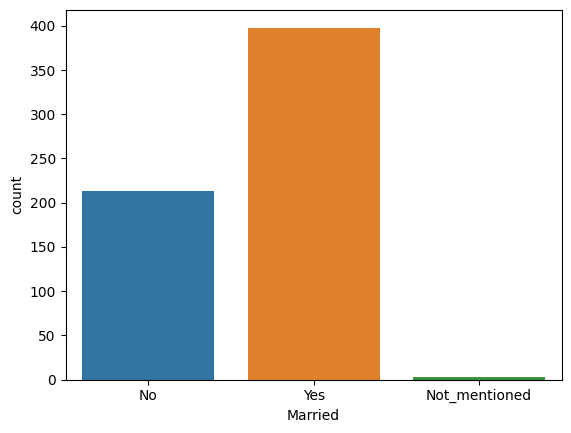

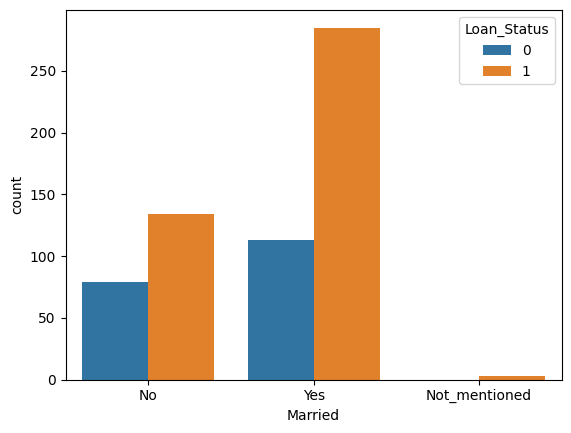

In [24]:
cat("Married")

In [25]:
data.Married.unique()

array(['No', 'Yes', 'Not_mentioned'], dtype=object)

In [26]:
data.Married.replace({'No':0, 'Yes':1, 'Not_mentioned':2},inplace=True)

In [27]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
data.Dependents.fillna(value="Not_mentioned",inplace=True)

Data Type
 object
Unique Datas
 ['0' '1' '2' '3+' 'Not_mentioned']
Describing the data
 count     614
unique      5
top         0
freq      345
Name: Dependents, dtype: object
Count of each unique datas
 0                345
1                102
2                101
3+                51
Not_mentioned     15
Name: Dependents, dtype: int64


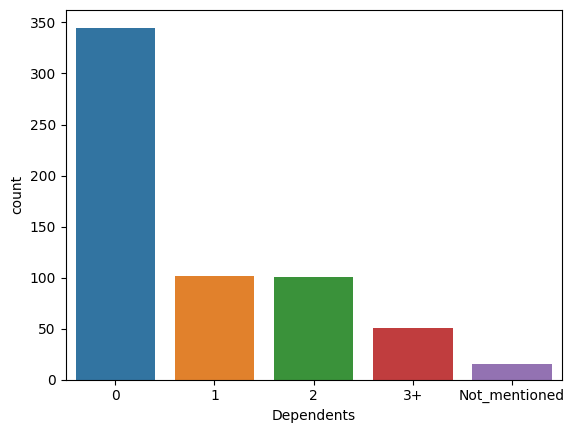

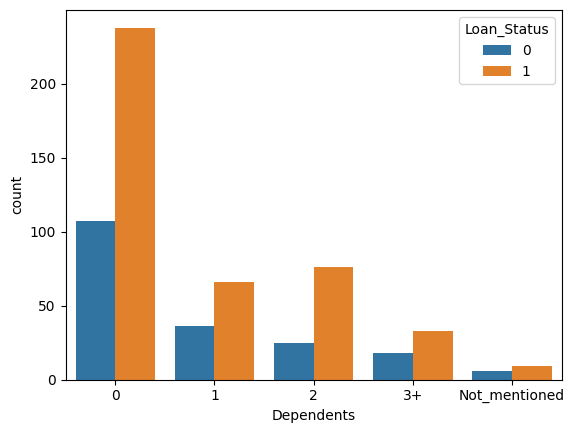

In [29]:
cat("Dependents")

In [30]:
data.Dependents.unique()

array(['0', '1', '2', '3+', 'Not_mentioned'], dtype=object)

In [31]:
data.Dependents.replace({'0':0, '1':1, '2':2, '3+':3, 'Not_mentioned':4},inplace=True)

Data Type
 object
Unique Datas
 ['Graduate' 'Not Graduate']
Describing the data
 count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Count of each unique datas
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


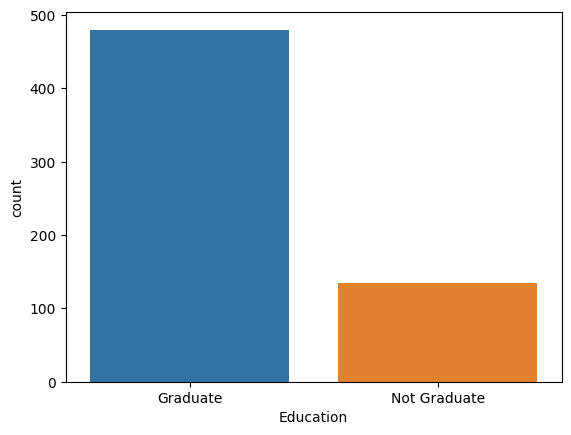

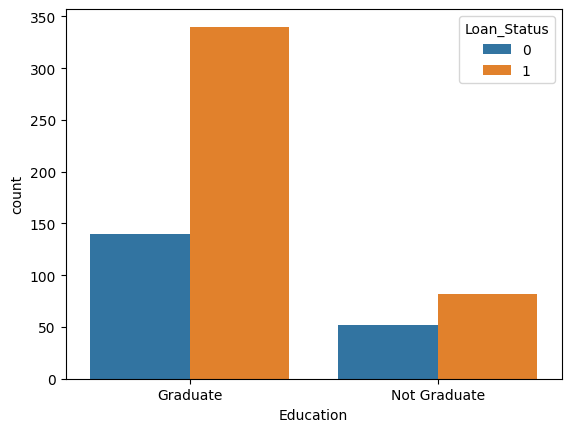

In [32]:
cat("Education")

In [33]:
data.Education.replace({'Graduate':1,'Not Graduate':0},inplace=True)

Data Type
 object
Unique Datas
 ['No' 'Yes' nan]
Describing the data
 count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
Count of each unique datas
 No     500
Yes     82
Name: Self_Employed, dtype: int64


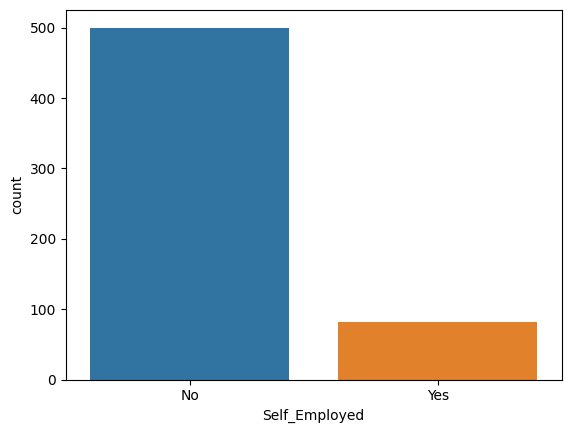

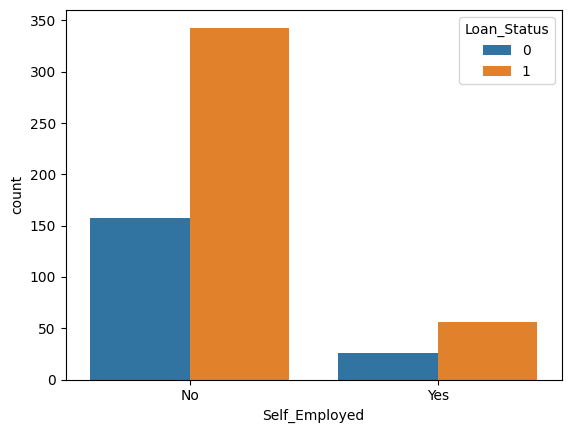

In [34]:
cat("Self_Employed")

In [35]:
data.Self_Employed.fillna("not_mentioned",inplace=True)

In [36]:
data.Self_Employed.unique()

array(['No', 'Yes', 'not_mentioned'], dtype=object)

In [37]:
data.Self_Employed=data.Self_Employed.replace({'No':0, 'Yes':1, 'not_mentioned':2})

In [38]:
data.drop(data[data.ApplicantIncome>30000].index,axis=0,inplace=True)

Data Type
 int64
Describing the data
 count      607.000000
mean      4894.420099
std       3473.383803
min        150.000000
25%       2874.000000
50%       3762.000000
75%       5705.500000
max      23803.000000
Name: ApplicantIncome, dtype: float64


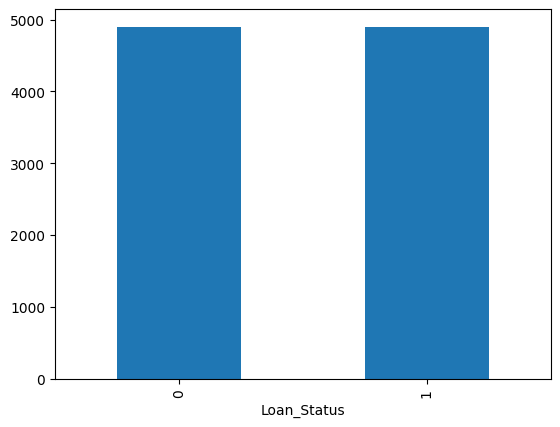

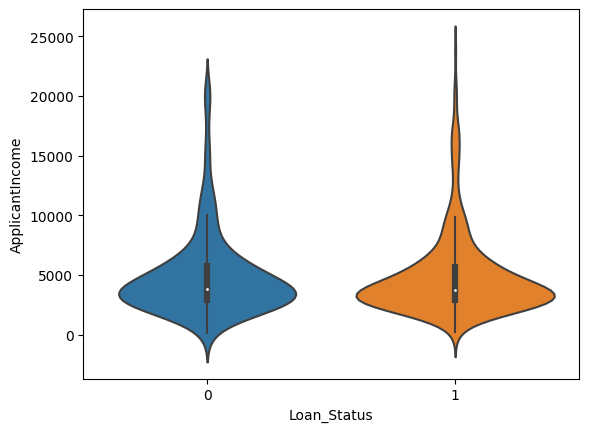

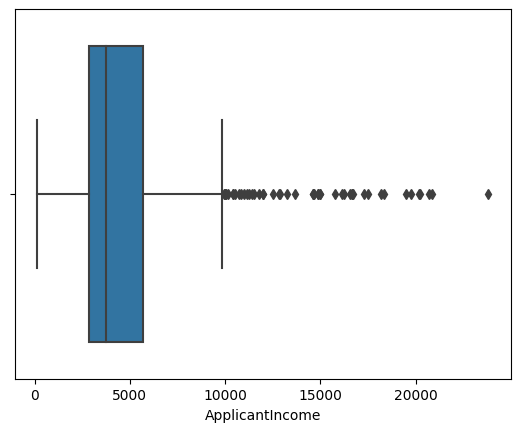

In [39]:
num("ApplicantIncome")

In [40]:
CI=data[data.CoapplicantIncome>15000]["CoapplicantIncome"].index
CI

Int64Index([402, 417, 581, 600], dtype='int64')

In [41]:
for i in CI:
       data["CoapplicantIncome"][i]=data["CoapplicantIncome"][i]/10

Data Type
 float64
Describing the data
 count      607.000000
mean      1460.858847
std       1771.007639
min          0.000000
25%          0.000000
50%       1229.000000
75%       2279.000000
max      11300.000000
Name: CoapplicantIncome, dtype: float64


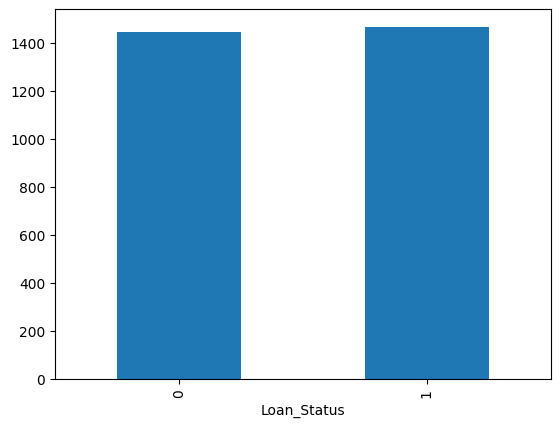

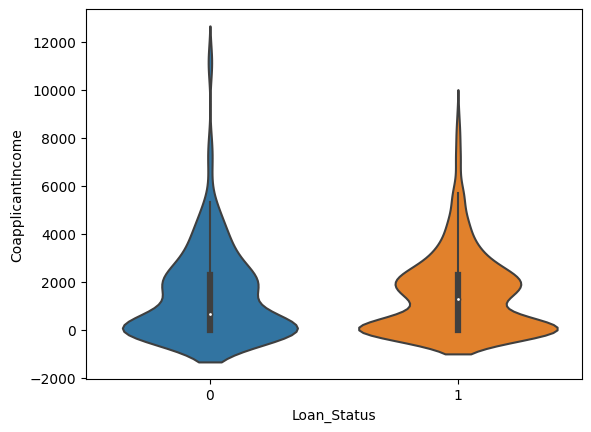

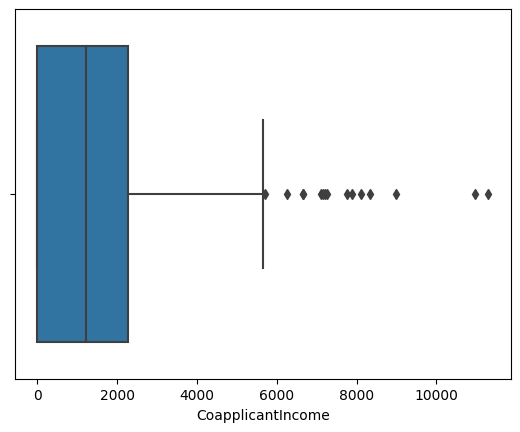

In [42]:
num("CoapplicantIncome")

In [43]:
data.LoanAmount.median()

127.0

In [44]:
data[data.LoanAmount.isnull()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1
35,LP001106,1,1,0,1,0,2275,2067.0,NaN,360.0,1.0,Urban,1
63,LP001213,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,0
81,LP001266,1,1,1,1,1,2395,0.0,NaN,360.0,1.0,Semiurban,1
95,LP001326,1,0,0,1,2,6782,0.0,NaN,360.0,NaN,Urban,0


In [45]:
data.LoanAmount.fillna(127,inplace=True)

Data Type
 float64
Describing the data
 count    607.000000
mean     142.978583
std       77.510957
min        9.000000
25%      100.000000
50%      127.000000
75%      162.000000
max      650.000000
Name: LoanAmount, dtype: float64


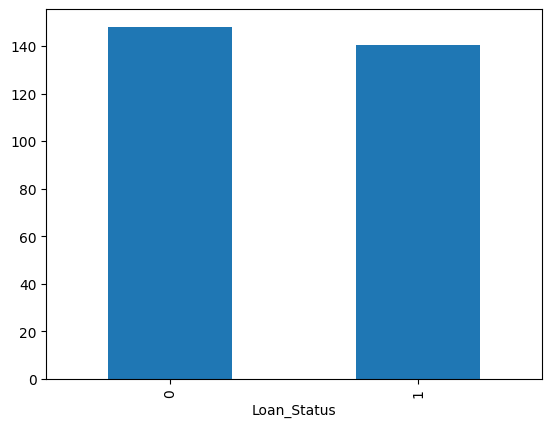

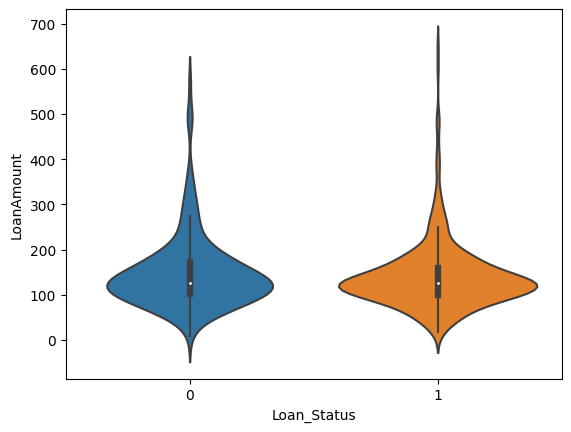

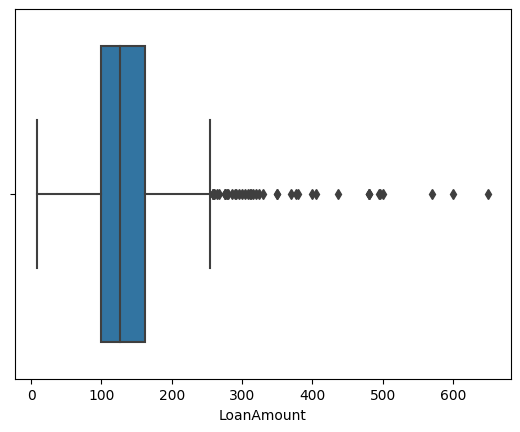

In [46]:
num("LoanAmount")

In [47]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)

Data Type
 float64
Describing the data
 count    607.000000
mean     342.899506
std       64.083496
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


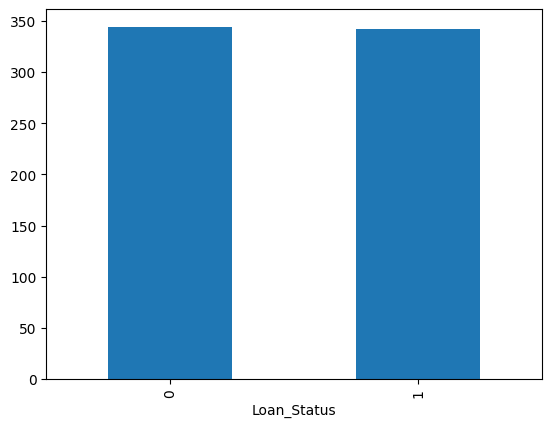

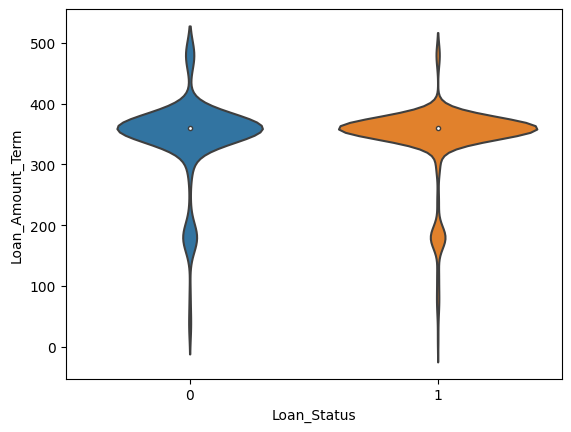

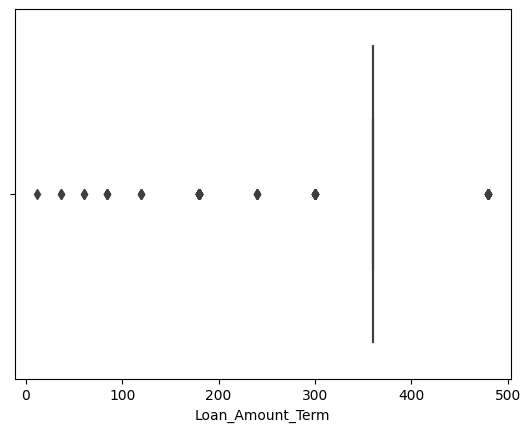

In [48]:
num("Loan_Amount_Term")

In [49]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [50]:
data.Credit_History.fillna("not_mentioned",inplace=True)

In [51]:
data.Credit_History=data.Credit_History.astype("object")

Data Type
 object
Unique Datas
 [1.0 0.0 'not_mentioned']
Describing the data
 count     607.0
unique      3.0
top         1.0
freq      470.0
Name: Credit_History, dtype: float64
Count of each unique datas
 1.0              470
0.0               87
not_mentioned     50
Name: Credit_History, dtype: int64


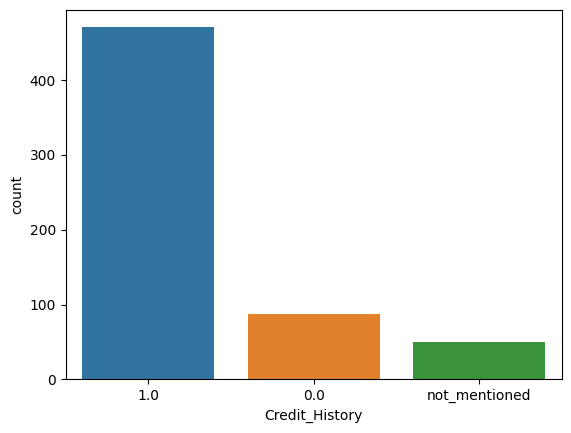

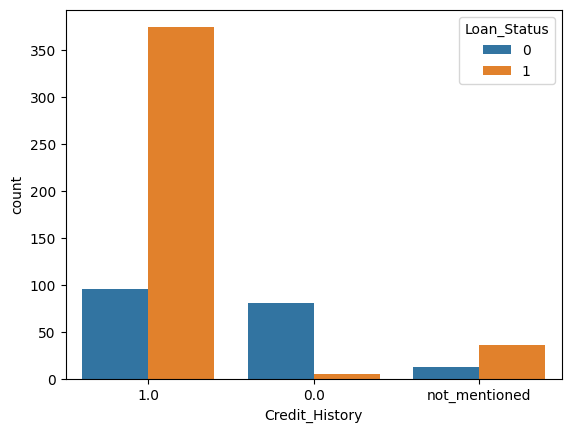

In [52]:
cat("Credit_History")

In [53]:
data.Credit_History.replace({"not_mentioned":2,"1.0":1,"0.0":0},inplace=True)

Data Type
 object
Unique Datas
 ['Urban' 'Rural' 'Semiurban']
Describing the data
 count           607
unique            3
top       Semiurban
freq            229
Name: Property_Area, dtype: object
Count of each unique datas
 Semiurban    229
Urban        200
Rural        178
Name: Property_Area, dtype: int64


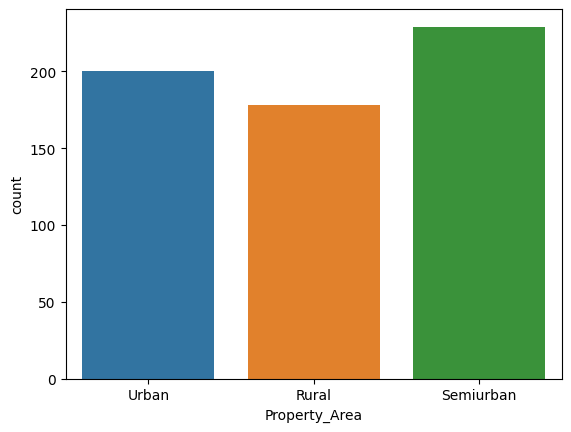

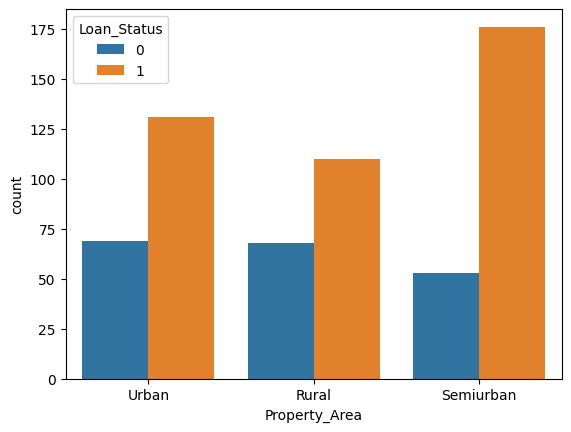

In [54]:
cat("Property_Area")

In [55]:
data["Property_Area"]=label_encoder.fit_transform(data["Property_Area"]).astype("int64")

In [56]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [57]:
data.reset_index(drop=True,inplace=True)

In [58]:
data.drop("Loan_ID",axis=1,inplace=True)

In [59]:
X=data.drop("Loan_Status",axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,127.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


In [60]:
y=data.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [62]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.38      0.54       131
           1       0.78      0.99      0.87       293

    accuracy                           0.80       424
   macro avg       0.85      0.68      0.71       424
weighted avg       0.83      0.80      0.77       424

[[ 50  81]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62        59
           1       0.79      0.99      0.88       124

    accuracy                           0.82       183
   macro avg       0.88      0.72      0.75       183
weighted avg       0.85      0.82      0.80       183

[[ 27  32]
 [  1 123]]


Resampling

In [63]:
train = pd.concat([X_train,y_train],axis=1)

In [64]:
train = train.reset_index(drop=True)

In [65]:
non_Loan_Status = train[train.Loan_Status == 0]
print('Non Loan_Status',len(non_Loan_Status))
Loan_Status_yes = train[train.Loan_Status == 1]
print('Loan_Status_yes =',len(Loan_Status_yes))

Non Loan_Status 131
Loan_Status_yes = 293


In [66]:
# unsample minority with replacement
from sklearn.utils import resample

In [67]:
non_Loan_Status_upsampled1= resample(non_Loan_Status,replace=True,n_samples=len(Loan_Status_yes),random_state=27)

In [68]:
new_train = pd.concat([Loan_Status_yes,non_Loan_Status_upsampled1])

In [69]:
new_train.Loan_Status.value_counts()

1    293
0    293
Name: Loan_Status, dtype: int64

In [70]:
X_train=new_train.drop("Loan_Status",axis=1)

In [71]:
y_train=new_train["Loan_Status"]

In [72]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.81      0.54      0.65       293
           1       0.66      0.87      0.75       293

    accuracy                           0.71       586
   macro avg       0.73      0.71      0.70       586
weighted avg       0.73      0.71      0.70       586

[[159 134]
 [ 38 255]]


In [73]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        59
           1       0.80      0.89      0.84       124

    accuracy                           0.77       183
   macro avg       0.74      0.71      0.72       183
weighted avg       0.76      0.77      0.76       183

[[ 31  28]
 [ 14 110]]


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
DRC=DecisionTreeClassifier()
DRC.fit(X_train,y_train)
y_train_pred=DRC.predict(X_train)
y_test_pred=DRC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

[[293   0]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.56        59
           1       0.79      0.80      0.80       124

    accuracy                           0.72       183
   macro avg       0.68      0.68      0.68       183
weighted avg       0.72      0.72      0.72       183

[[33 26]
 [25 99]]


In [76]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

[[293   0]
 [  0 293]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67        59
           1       0.82      0.94      0.88       124

    accuracy                           0.82       183
   macro avg       0.82      0.76      0.77       183
weighted avg       0.82      0.82      0.81       183

[[ 34  25]
 [  8 116]]


In [77]:
n_estimators=[i for i in range(50,500,50)]
max_depth=[i for i in range(5,30,5)]
max_leaf_nodes=[i for i in range(2,20,2)]
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"max_leaf_nodes":max_leaf_nodes}
RF_model = RandomizedSearchCV(estimator = RFC,param_distributions = random_grid_RF,cv=4,random_state = 0)

In [78]:
RF_model.fit(X_train,y_train)
RF_model.best_params_

{'n_estimators': 250, 'max_leaf_nodes': 18, 'max_depth': 15}

In [79]:
RFC=RandomForestClassifier(n_estimators=300,max_leaf_nodes=18,max_depth=25)
RFC.fit(X_train,y_train)
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       293
           1       0.82      0.98      0.90       293

    accuracy                           0.89       586
   macro avg       0.90      0.89      0.88       586
weighted avg       0.90      0.89      0.88       586

[[231  62]
 [  5 288]]
              precision    recall  f1-score   support

           0       0.97      0.49      0.65        59
           1       0.80      0.99      0.89       124

    accuracy                           0.83       183
   macro avg       0.89      0.74      0.77       183
weighted avg       0.86      0.83      0.81       183

[[ 29  30]
 [  1 123]]


<Axes: >

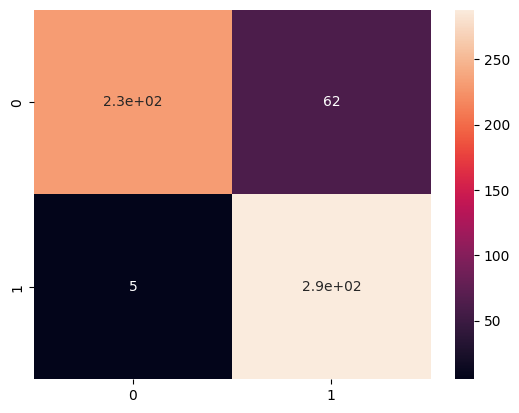

In [85]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)